In [2]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt

# Taylor Series

In general the Taylor series evaluated about a point $a$ is given by:

\begin{equation}
    f(x) = \sum_{k=0}^\infty f^k(a) \frac{(x-a)^k}{k !}
\end{equation}

Do notice the difference between the lecture notes and this expression - the lecture notes consider $x$ as a small perturbation about $a$. Whereas in this definition $x$ is centered around the origin.

Since an infinite series can be hard to work with, commonly we truncate the series at a given point lets say $n$ - where $n$ of course is an integer, and so we are left with:

\begin{equation}
    f(x) = \sum_{k=0}^n f^k(a) \frac{(x-a)^k}{k !} + \mathcal{R}_{n + 1}(\zeta)
\end{equation}

# Remainder

Where $\mathcal{R}_{n + 1}(\zeta)$ is the Remainder Term, 

\begin{equation}
    \mathcal{R}_{n + 1}(\zeta) = \frac{(x-a)^{n + 1}}{ (n + 1)!} f^{n + 1}(\zeta)
\end{equation}

For a given evaluation at $x$ there exists a $\zeta$ which *exactly* captures the difference between the truncated Taylor Expansion and the function $f(x)$.

Such that $\zeta$ is in between $x$ and $a$.

$a \leq \zeta \leq x$, if $x > a$

$x \leq \zeta \leq a$, if $x < a$


Since, we do not know what exact value of $\zeta$ takes, it is good practice to maximize the Remainder to ensure that we precisely bound our Taylor Series.

So $\zeta$ is chosen such that $ | f^{n + 1}(\zeta) | $ is maximized within the bounds mentioned above. 

Notice we use the absolute value of the function since the Remainder can be an under or an overestimate. 

If $f^{n + 1}$ changes sign within the bounds one should find both its minimum and maximum value to give both an upper and lower bound - so it is crucial to understand the behaviour of $f^{n + 1}$ when using the Remainder to bound the Taylor Series.

# Scaling of the Remainder

When describing how the remainder scales with respect to $ x $, it is standard to use the
Big $ \mathcal{O} $ notation, which captures the rate of growth of the leading term.


If $ f^{(n+1)} $ is bounded near $ a $, then

\begin{equation}
R_n(x) = \mathcal{O}\!\left((x - a)^{n+1}\right)
\quad \text{as } x \to a.
\end{equation}

So, keeping terms up to order $ n $ results in an error that grows no faster than $ (x - a)^{n+1} $.

Notice this scaling is only valid near the point which the Taylor series is expanded at $a$ such that $(|x-a| < 1)$ - any point beyond this scaling is invalid - look at the Example of the Exponential Function $y = e^x$.

Simply because if $(|x-a| < 1)$ then $(|x-a|^{n + 1} > |x-a|^{n + 2})$ - i.e the smaller the power the larger the term.

# Taylor Series of Gaussian

As an example lets apply a Taylor Series to a Gaussian:

$ y = e^{-x^2} $

Deriving the Taylor series can be a task for you :)

After finding the Taylor Series lets truncate at the **first 3,4 and 5 terms** and plot the approximation and the remainder.

Notice how the remainder is *both* positive and negative, depending on the sign of the n-th derivative. 

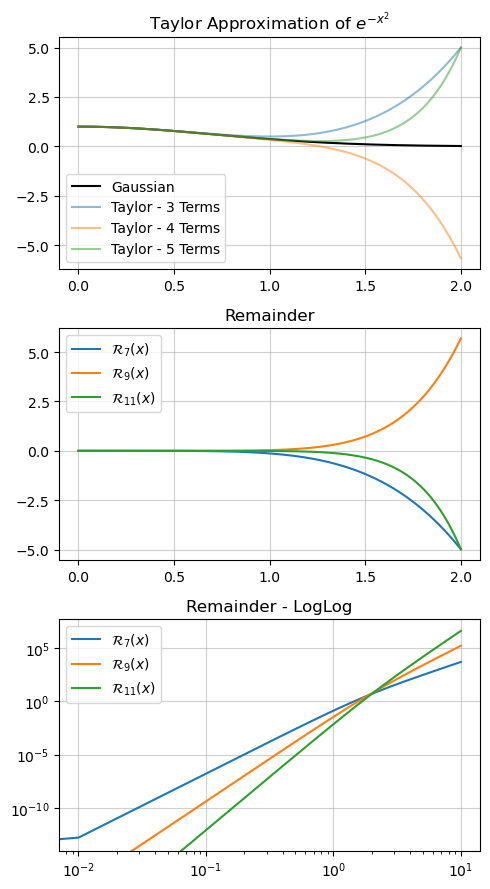

In [3]:
x = np.linspace(0, 2 , 1000)
y = np.exp(-x**2)
def Taylor_Series_GaussianX(x, n):
    return np.sum([ (-1)**k * (x)**(2*k)/factorial(k) for k in range(n)], axis = 0)

y_taylor_3 = Taylor_Series_GaussianX(x, 3)
y_taylor_4 = Taylor_Series_GaussianX(x, 4)
y_taylor_5 = Taylor_Series_GaussianX(x, 5)

remainder_3 = y - y_taylor_3
remainder_4 = y - y_taylor_4
remainder_5 = y - y_taylor_5

fig, axs = plt.subplots(3, 1, figsize=(5, 9))

axs[0].plot(x, y, label='Gaussian', color = 'black')

axs[0].plot(x, y_taylor_3, label = 'Taylor - 3 Terms', alpha = 0.5)
axs[0].plot(x, y_taylor_4, label = 'Taylor - 4 Terms', alpha = 0.5)
axs[0].plot(x, y_taylor_5, label = 'Taylor - 5 Terms', alpha = 0.5)

axs[1].plot(x, (remainder_3), label = r'$\mathcal{R}_{7}(x)$')
axs[1].plot(x, (remainder_4), label = r'$\mathcal{R}_{9}(x)$')
axs[1].plot(x, (remainder_5), label = r'$\mathcal{R}_{11}(x)$')

x = np.linspace(0, 10 , 1000)
y = np.exp(-x**2)

y_taylor_3 = Taylor_Series_GaussianX(x, 3)
y_taylor_4 = Taylor_Series_GaussianX(x, 4)
y_taylor_5 = Taylor_Series_GaussianX(x, 5)

remainder_3 = y - y_taylor_3
remainder_4 = y - y_taylor_4
remainder_5 = y - y_taylor_5


axs[2].loglog(x, np.abs(remainder_3), label = r'$\mathcal{R}_{7}(x)$')
axs[2].loglog(x, np.abs(remainder_4), label = r'$\mathcal{R}_{9}(x)$')
axs[2].loglog(x, np.abs(remainder_5), label = r'$\mathcal{R}_{11}(x)$')

axs[0].set_xticks([0, 0.5, 1, 1.5, 2])
axs[1].set_xticks([0, 0.5, 1, 1.5, 2])

axs[0].set_yticks([-5, -2.5, 0, 2.5, 5])
axs[1].set_yticks([-5, -2.5, 0, 2.5, 5])
axs[2].set_yticks([1e-10, 1e-5, 1e-0, 1e5])

axs[0].set_title(r'Taylor Approximation of $e^{-x^2}$')
axs[1].set_title('Remainder')
axs[2].set_title('Remainder - LogLog')


axs[0].grid(alpha = 0.6)
axs[1].grid(alpha = 0.6)
axs[2].grid(alpha=0.6)

axs[2].set_ylim(1e-14, None)

axs[0].legend()
axs[1].legend()
axs[2].legend()

fig.tight_layout()



Since the series is finite as $x \rightarrow \infty$, we can also notice that the remainder is well bound by a polynomial of $\mathcal{O}({x^{n + 1}})$, where $n$ is the order of the Taylor Series. This is shown by the straight lines the remainder forms in the log-log plots.

Note: if $y = ax^b$ - then on a loglog plot this will form a straight line with gradient $b$

# Taylor Series of an Exponential

To show how the bounding of the remainder is only valid for $|x-a|<1$ look at the Taylor series of the exponential function. We can see that on the loglog plot the remainder starts becoming curved beyond $x > 1$ showing how $\mathcal{O}({x^{n + 1}})$ is not valid for all $x$.

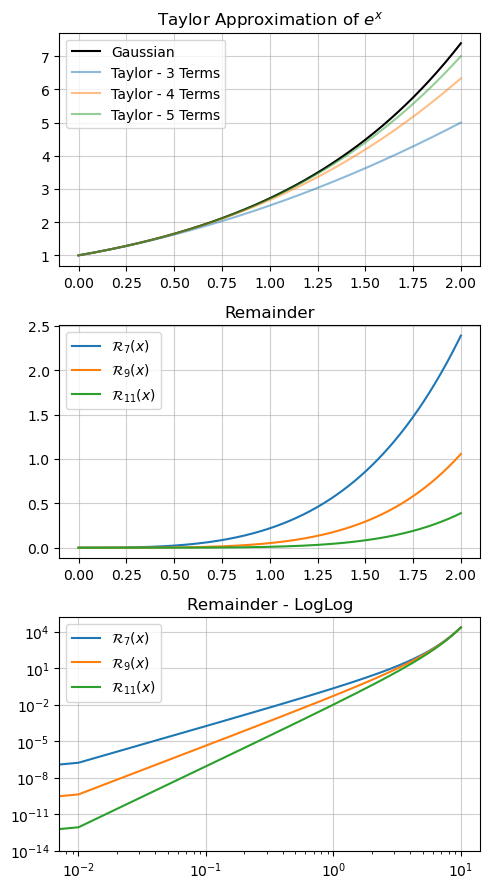

In [4]:
x = np.linspace(0, 2 , 1000)
y = np.exp(x)

def Taylor_Series_ExpX(x, n):
    return np.sum([(x**k)/factorial(k) for k in range(n)], axis = 0)

y_taylor_3 = Taylor_Series_ExpX(x, 3)
y_taylor_4 = Taylor_Series_ExpX(x, 4)
y_taylor_5 = Taylor_Series_ExpX(x, 5)

remainder_3 = y - y_taylor_3
remainder_4 = y - y_taylor_4
remainder_5 = y - y_taylor_5

fig, axs = plt.subplots(3, 1, figsize=(5, 9))

axs[0].plot(x, y, label='Gaussian', color = 'black')

axs[0].plot(x, y_taylor_3, label = 'Taylor - 3 Terms', alpha = 0.5)
axs[0].plot(x, y_taylor_4, label = 'Taylor - 4 Terms', alpha = 0.5)
axs[0].plot(x, y_taylor_5, label = 'Taylor - 5 Terms', alpha = 0.5)

axs[1].plot(x, (remainder_3), label = r'$\mathcal{R}_{7}(x)$')
axs[1].plot(x, (remainder_4), label = r'$\mathcal{R}_{9}(x)$')
axs[1].plot(x, (remainder_5), label = r'$\mathcal{R}_{11}(x)$')

x = np.linspace(0, 10 , 1000)
y = np.exp(x)

y_taylor_3 = Taylor_Series_ExpX(x, 3)
y_taylor_4 = Taylor_Series_ExpX(x, 4)
y_taylor_5 = Taylor_Series_ExpX(x, 5)

remainder_3 = y - y_taylor_3
remainder_4 = y - y_taylor_4
remainder_5 = y - y_taylor_5


axs[2].loglog(x, np.abs(remainder_3), label = r'$\mathcal{R}_{7}(x)$')
axs[2].loglog(x, np.abs(remainder_4), label = r'$\mathcal{R}_{9}(x)$')
axs[2].loglog(x, np.abs(remainder_5), label = r'$\mathcal{R}_{11}(x)$')

axs[0].set_title(r'Taylor Approximation of $e^x$')
axs[1].set_title('Remainder')
axs[2].set_title('Remainder - LogLog')


axs[0].grid(alpha = 0.6)
axs[1].grid(alpha = 0.6)
axs[2].grid(alpha=0.6)

axs[2].set_ylim(1e-14, None)

axs[0].legend()
axs[1].legend()
axs[2].legend()

fig.tight_layout()



# Taylor Series of a Logarithm $ln(1 + x)$

This is to show that the Taylor series does not converge for all $x$ - feel free to increase the number of terms of Taylor Series. But beyond $|x| > 1$ the Taylor Series for $ln(1 + x)$ does not converge.

This is in the extension part of the course so not really necessary but should be kept in mind when using Talyor Series.


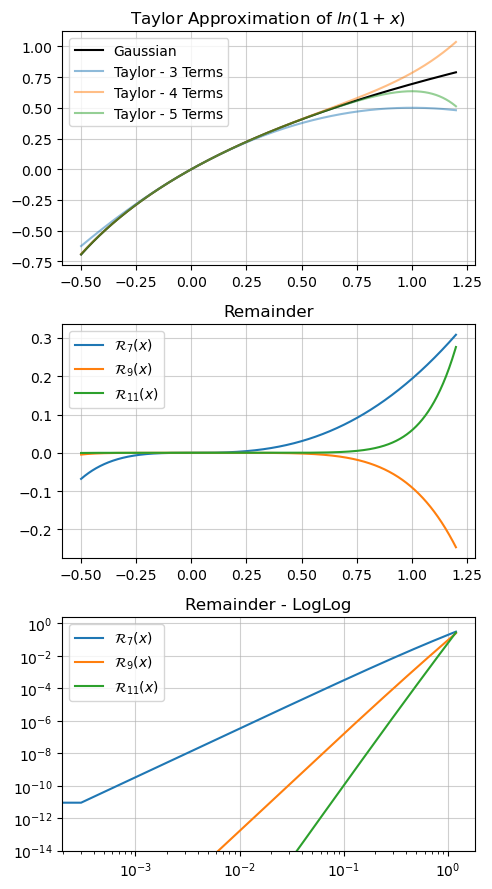

In [6]:
x = np.linspace(-0.5, 1.2 , 1000)
y = np.log(1 + x)

def Taylor_Series_LNX(x, n):
    return np.sum([(-1)**(k + 1)*(x**k)/k for k in range(1, n)], axis = 0)

y_taylor_3 = Taylor_Series_LNX(x, 3)
y_taylor_6 = Taylor_Series_LNX(x, 6)
y_taylor_9 = Taylor_Series_LNX(x, 9)

remainder_3 = y - y_taylor_3
remainder_6 = y - y_taylor_6
remainder_9 = y - y_taylor_9

fig, axs = plt.subplots(3, 1, figsize=(5, 9))

axs[0].plot(x, y, label='Gaussian', color = 'black')

axs[0].plot(x, y_taylor_3, label = 'Taylor - 3 Terms', alpha = 0.5)
axs[0].plot(x, y_taylor_6, label = 'Taylor - 4 Terms', alpha = 0.5)
axs[0].plot(x, y_taylor_9, label = 'Taylor - 5 Terms', alpha = 0.5)

axs[1].plot(x, (remainder_3), label = r'$\mathcal{R}_{7}(x)$')
axs[1].plot(x, (remainder_6), label = r'$\mathcal{R}_{9}(x)$')
axs[1].plot(x, (remainder_9), label = r'$\mathcal{R}_{11}(x)$')

x = np.linspace(-0.5, 1.2 , 1000)
y = np.log(1 + x)

y_taylor_3 = Taylor_Series_LNX(x, 3)
y_taylor_6 = Taylor_Series_LNX(x, 6)
y_taylor_9 = Taylor_Series_LNX(x, 9)

remainder_3 = y - y_taylor_3
remainder_6 = y - y_taylor_6
remainder_9 = y - y_taylor_9


axs[2].loglog(x, np.abs(remainder_3), label = r'$\mathcal{R}_{7}(x)$')
axs[2].loglog(x, np.abs(remainder_6), label = r'$\mathcal{R}_{9}(x)$')
axs[2].loglog(x, np.abs(remainder_9), label = r'$\mathcal{R}_{11}(x)$')

axs[0].set_title(r'Taylor Approximation of $ln(1 +x)$')
axs[1].set_title('Remainder')
axs[2].set_title('Remainder - LogLog')


axs[0].grid(alpha = 0.6)
axs[1].grid(alpha = 0.6)
axs[2].grid(alpha=0.6)

axs[2].set_ylim(1e-14, None)

axs[0].legend()
axs[1].legend()
axs[2].legend()

fig.tight_layout()

